In [4]:
f = open("../api_key.txt", "r")
api_key = f.readline()

In [46]:
import requests
import json
from os.path import exists
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
def grab_daily_data(company_label, api_key):
    file_path = "../data/" + company_label + ".json"
    if exists(file_path):
        f = open(file_path)
        return json.load(f)
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + company_label + "&outputsize=full&apikey=" + api_key
    r = requests.get(url)
    data = r.json()
    with open("../data/" + company_label + ".json", "w") as output_file:
        json.dump(data, output_file)
    return data

In [69]:
def plot_close_prices(target):
    if isinstance(target, str):
        target = grab_daily_data(target, api_key)
    time_series = []
    stock_prices = []
    for day in data['Time Series (Daily)']:
        time_series.append(day)
        stock_prices.append(data['Time Series (Daily)'][day]['4. close'])
    stock_prices = np.array(stock_prices).astype(float)
    fig, ax = plt.subplots()
    ax.plot(pd.to_datetime(time_series), stock_prices)

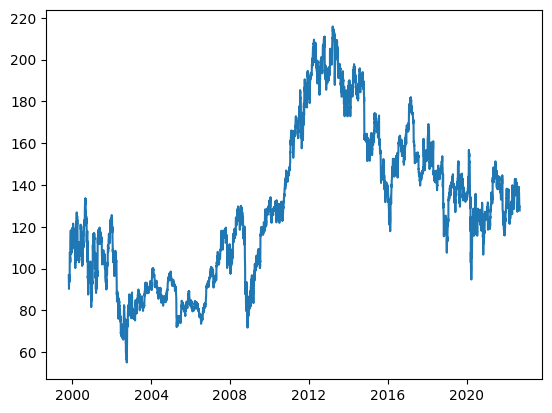

In [71]:
plot_close_prices("IBM")